In [1]:
import pandas as pd

In [2]:
pwd

'/Users/richard'

In [3]:
cd Downloads

/Users/richard/Downloads


In [8]:
heart = pd.read_csv('heart.csv')

In [9]:
heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


https://stackoverflow.com/questions/36285155/pandas-get-dummies

In [10]:
heart = pd.get_dummies(heart,columns=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope','FastingBS'],drop_first=True)

In [11]:
heart.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,FastingBS_1
0,40,140,289,172,0.0,0,1,1,0,0,1,0,0,0,1,0
1,49,160,180,156,1.0,1,0,0,1,0,1,0,0,1,0,0
2,37,130,283,98,0.0,0,1,1,0,0,0,1,0,0,1,0
3,48,138,214,108,1.5,1,0,0,0,0,1,0,1,1,0,0
4,54,150,195,122,0.0,0,1,0,1,0,1,0,0,0,1,0


In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = heart.drop('HeartDisease',axis=1)

In [16]:
y = heart['HeartDisease']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression(class_weight='Balanced',n_jobs=-1)

In [22]:
lr.fit(X_train,y_train)

LogisticRegression(class_weight='Balanced', n_jobs=-1)

In [23]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [24]:
preds = lr.predict(X_test)

In [25]:
preds[2]

1

In [26]:
lr.predict_proba(X_test)[2]

array([0.02935527, 0.97064473])

In [27]:
from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve

In [28]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.92      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



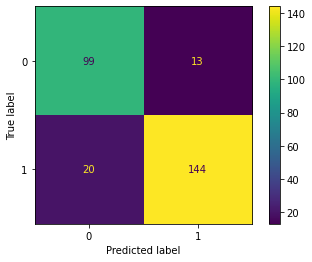

In [29]:
plot_confusion_matrix(lr,X_test,y_test)

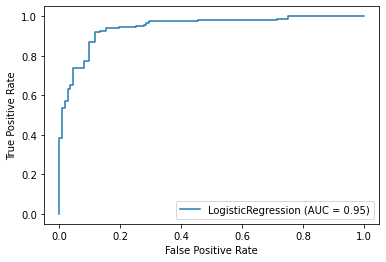

In [30]:
plot_roc_curve(lr,X_test,y_test)

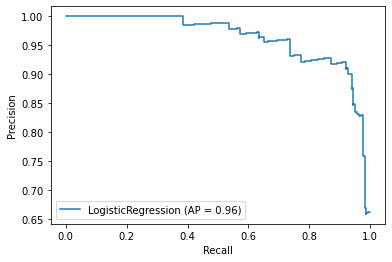

In [31]:
plot_precision_recall_curve(lr,X_test,y_test)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=50)

In [34]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [35]:
preds = knn.predict(X_test)

In [36]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       112
           1       0.91      0.88      0.90       164

    accuracy                           0.88       276
   macro avg       0.87      0.88      0.88       276
weighted avg       0.88      0.88      0.88       276



In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
param = {'n_neighbors':[5,10,15,20,25,50,100]}

In [45]:
gsc = GridSearchCV(KNeighborsClassifier(n_jobs=-1,weights='distance'),param,scoring='precision',cv=20)

In [46]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=20,
             estimator=KNeighborsClassifier(n_jobs=-1, weights='distance'),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 50, 100]},
             scoring='precision')

In [47]:
gsc.best_params_

{'n_neighbors': 15}

In [48]:
gsc.score(X_test,y_test)

0.9316770186335404

In [49]:
preds = gsc.predict(X_test)

In [50]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       112
           1       0.93      0.91      0.92       164

    accuracy                           0.91       276
   macro avg       0.90      0.91      0.91       276
weighted avg       0.91      0.91      0.91       276



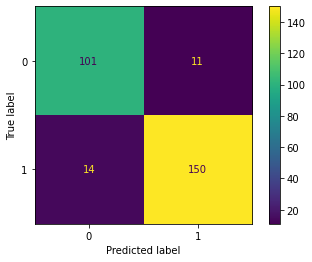

In [51]:
plot_confusion_matrix(gsc,X_test,y_test)

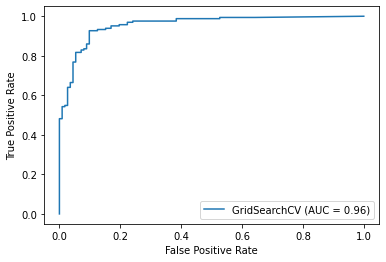

In [52]:
plot_roc_curve(gsc,X_test,y_test)

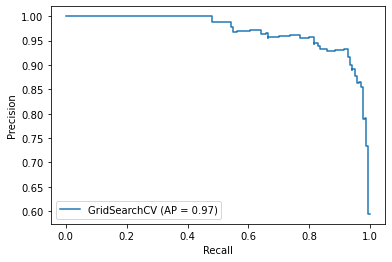

In [53]:
plot_precision_recall_curve(gsc,X_test,y_test)